In [ ]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,534 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../tesserac

In [ ]:
!tesseract -v

tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


## Step 2. Install additional language packs, such as -tam

In [ ]:
!apt-get install tesseract-ocr-tam

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-tam
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,070 kB of archives.
After this operation, 3,253 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-tam all 4.00~git24-0e00fe6-1.2 [1,070 kB]
Fetched 1,070 kB in 2s (462 kB/s)
Selecting previously unselected package tesseract-ocr-tam.
(Reading database ... 155276 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-tam_4.00~git24-0e00fe6-1.2_all.deb ...
Unpacking tesseract-ocr-tam (4.00~git24-0e00fe6-1.2) ...
Setting up tesseract-ocr-tam (4.00~git24-0e00fe6-1.2) ...


In [ ]:
!ls -ltr /usr/share/tesseract-ocr/4.00/tessdata/tam.traineddata

-rw-r--r-- 1 root root 3237963 Sep 15  2017 /usr/share/tesseract-ocr/4.00/tessdata/tam.traineddata


## Step 3. Upload your pdf 
### (or read it from your google drive - not shown here.)

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving TVA_BOK_0009120_அபிதான_சிந்தாமணி.pdf to TVA_BOK_0009120_அபிதான_சிந்தாமணி.pdf


## Step 4. Extract images using Fitz

In [ ]:
!pip install PyMuPDF

     |████████████████████████████████| 8.7 MB 3.7 MB/s 


In [ ]:
import fitz

In [ ]:
fname = 'TVA_BOK.pdf'  
doc = fitz.open(fname)
for i in range(len(doc)):
  for img in doc.getPageImageList(i):
    xref = img[0]  # check if this xref was handled already?
    pix = fitz.Pixmap(doc, xref)
    if pix.n < 5:  # this is GRAY or RGB
      pix.writePNG("p%s.png" % (i))
    else:  # CMYK needs to be converted to RGB first
      pix1 = fitz.Pixmap(fitz.csRGB, pix)  # make RGB pixmap copy
      pix1.writePNG("p%s.png" % (i))
      pix1 = None  # release storage early (optional)
    pix = None  # release storage early (optional)

Deprecation: 'getPageImageList' removed from class 'Document' after v1.19 - use 'get_page_images'.
Deprecation: 'writePNG' removed from class 'Pixmap' after v1.19 - use 'save'.


## Step 5. Display the image.

In [ ]:
# import the necessary packages
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

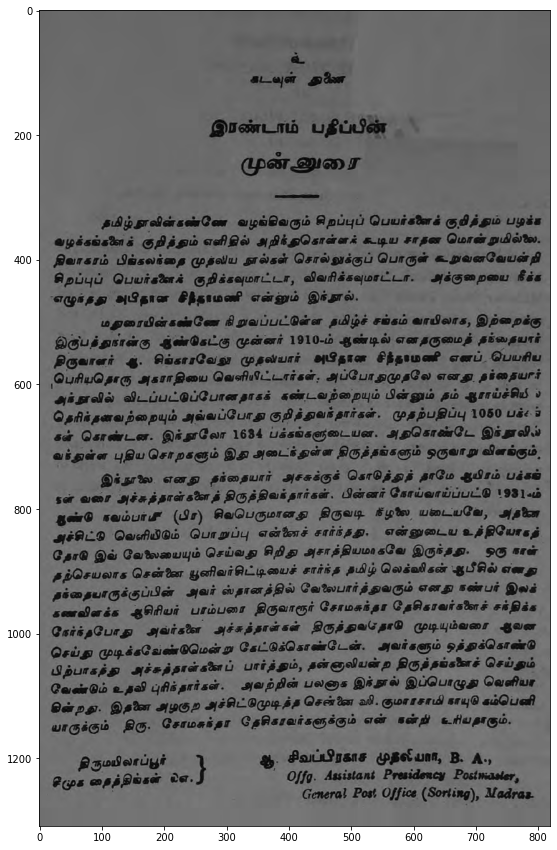

In [ ]:
pagename = 'p3'
image = cv2.imread(pagename+'.png')
plt.figure(figsize=(10,15))
plt.imshow(image, cmap='gray')

In [ ]:
pagename = 'p3'
!tesseract {pagename}.png {pagename} -l tam+eng --psm 6 


!cat {pagename}.txt

Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
a
கடவுள்‌ துணை
இரண்டாம்‌ பதிப்பின்‌
முன்னுரை

சமிழ்தூலின்சண்ணே வழங்வெரும்‌ ஈறப்புப்‌ பெயர்களைச்‌ குறித்தும்‌ பழச்ச
வழக்கங்களை க்‌ குறித்தும்‌ எனில்‌ அநிர் துசகொள்ளச்‌ கூடிய சாதன மொன்றுமில்லை.
Bers பிங்கலர்சை முத்விய நூல்கள்‌ சொல்லுக்குப்‌ பொருள்‌ கூறுவனவேயன்றி
சிறப்புப்‌ பெயர்களைக்‌ குறிச்சவுமாட்டா, விவரிக்சவுமாட்டா. அச்குறையை நீச்ச
"எழுக்தது அபிதான சிந்தாமணி என்னும்‌ இர்தால்‌.

மதுரையின்கண்ணே நிறுவப்பட்டுள்ள தமிழ்ச்‌ சங்கம்‌ வாயிலாக, இற்றைக்கு.
இருபத்துசான்கு ஆண்கெட்கு மன்னர்‌ 1910-ம்‌ ஆண்டில்‌ எனதருமைத்‌ தர்தையார்‌
திருவாளர்‌ ஆ. சிங்காரவேலு மு.தவியார்‌ அபிதான சிந்தாமணி எனப்‌. பெயரிய
(பெரியதொரு அகராதியை வெளியீட்டார்சள்‌. ௮அப்போதுமுசலே எனது. தர்தையார்‌
அச்தூவில்‌ விடப்பட்டுப்போனதாகக்‌ சண்டவற்றையும்‌ பின்னும்‌ தம்‌ ஆசாய்ச்சியீ 2.
தெரிர்சனவ.ற்றையும்‌ அவ்வப்போது குறிதீதுவர்தார்கள்‌. முதற்பதிப்பு 1050 பச்‌ஃ.3
சன்‌ சொண்டன. இர்தூலோ 1634 ப்ச்சங்களுடையன. ௮, தகொண்டே இசஅ்தாலிம்‌
வர்துள்ள புதிய சொறகளும்‌ இது: அடைக்துள்ள இருத்தங்களும்‌ 

## Step 7. Process all images from the book.

In [ ]:
import subprocess

import glob
image_files = glob.glob('*.png')

num_pages = len(image_files)
for i in range(num_pages):
  print(i)
  infilename = str(i)+'.png'
  outfilename = str(i)
  print(infilename)
  output = subprocess.Popen("tesseract "+infilename+" "+outfilename+" -l tam+eng --psm 6",
                                    shell = True,
                                    stdout = subprocess.PIPE
      ).stdout.read()

## Step 8. Combine all texts into one output text file.

In [ ]:
num_pages = len(glob.glob('p*.txt'))
num_pages

1

In [ ]:
fname = 'TVA_BOK.pdf'
oname = fname.replace('.pdf','_ocred_text.txt')
o=open(oname, 'w', encoding='utf-8')
txts = [str(i)+'.txt' for i in range(num_pages)]
for f in txts:
  text = open(f, encoding='utf-8').read()
  o.write('         '+str(f).replace('.txt','')+'   \n')
  o.write(text)
  o.write('=========\n')

In [ ]:
from google.colab import files
files.download(oname)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>